# Synthetic Control Method

# Data

In [2]:
from causalis.scenarios.synthetic_control.dgp import generate_scm_gamma_26

df = generate_scm_gamma_26(return_panel_data=False, include_oracles=True)

n_pre_periods = 36
time_start = 1
intervention_time = time_start + n_pre_periods  # 37

treated = df[df["unit_id"] == "treated"].copy()
post = treated["time_id"] >= intervention_time

print(f' Ground-truth ATT is {treated.loc[post, "tau_realized_true"].mean()}')

 Ground-truth ATT is 4.027960593520111


In [3]:
from causalis.data_contracts import PanelDataSCM

paneldata = PanelDataSCM(
    df=df,
    y='y',
    unit_id='unit_id',
    time_id='time_id',
    treated_unit="treated",      # or your treated unit id in df["unit_id"]
    intervention_time=37,        # first post-treatment time
)
paneldata

PanelDataSCM(df=(432, 3), unit_id='unit_id', time_id='time_id', y='y', treated_unit='treated', intervention_time=37, donor_units=['donor_1', 'donor_2', 'donor_3', 'donor_4', 'donor_5', 'donor_6', 'donor_7', 'donor_8'])

In [4]:
paneldata.df.head()

,unit_id,time_id,y
0,donor_1,1,9.962375
1,donor_1,2,14.184782
2,donor_1,3,28.261406
3,donor_1,4,15.889475
4,donor_1,5,25.256879


# EDA

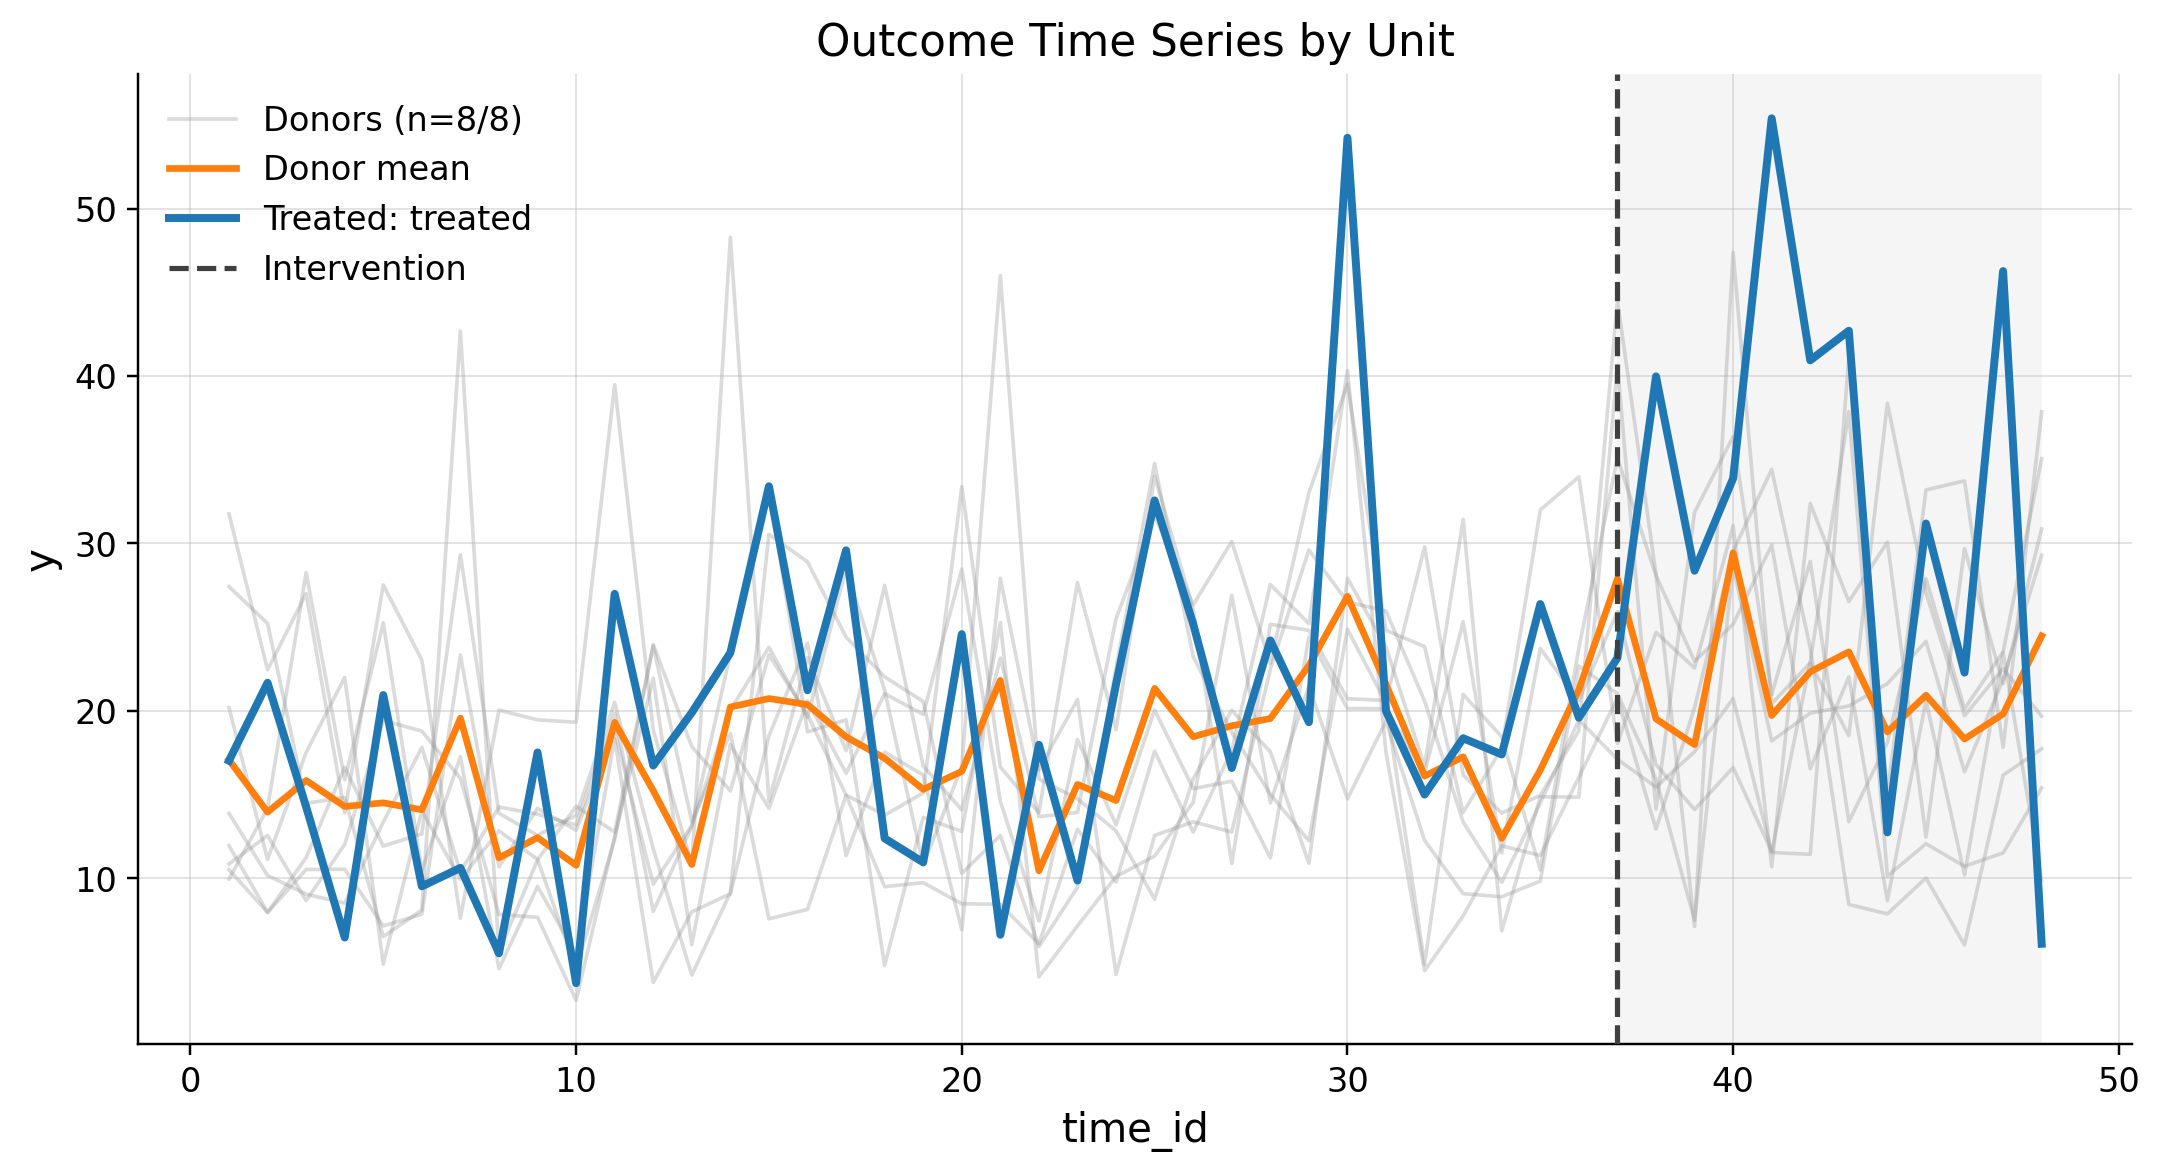

In [5]:
from causalis.scenarios.synthetic_control.refutation import outcome_panel_plot

outcome_panel_plot(paneldata)

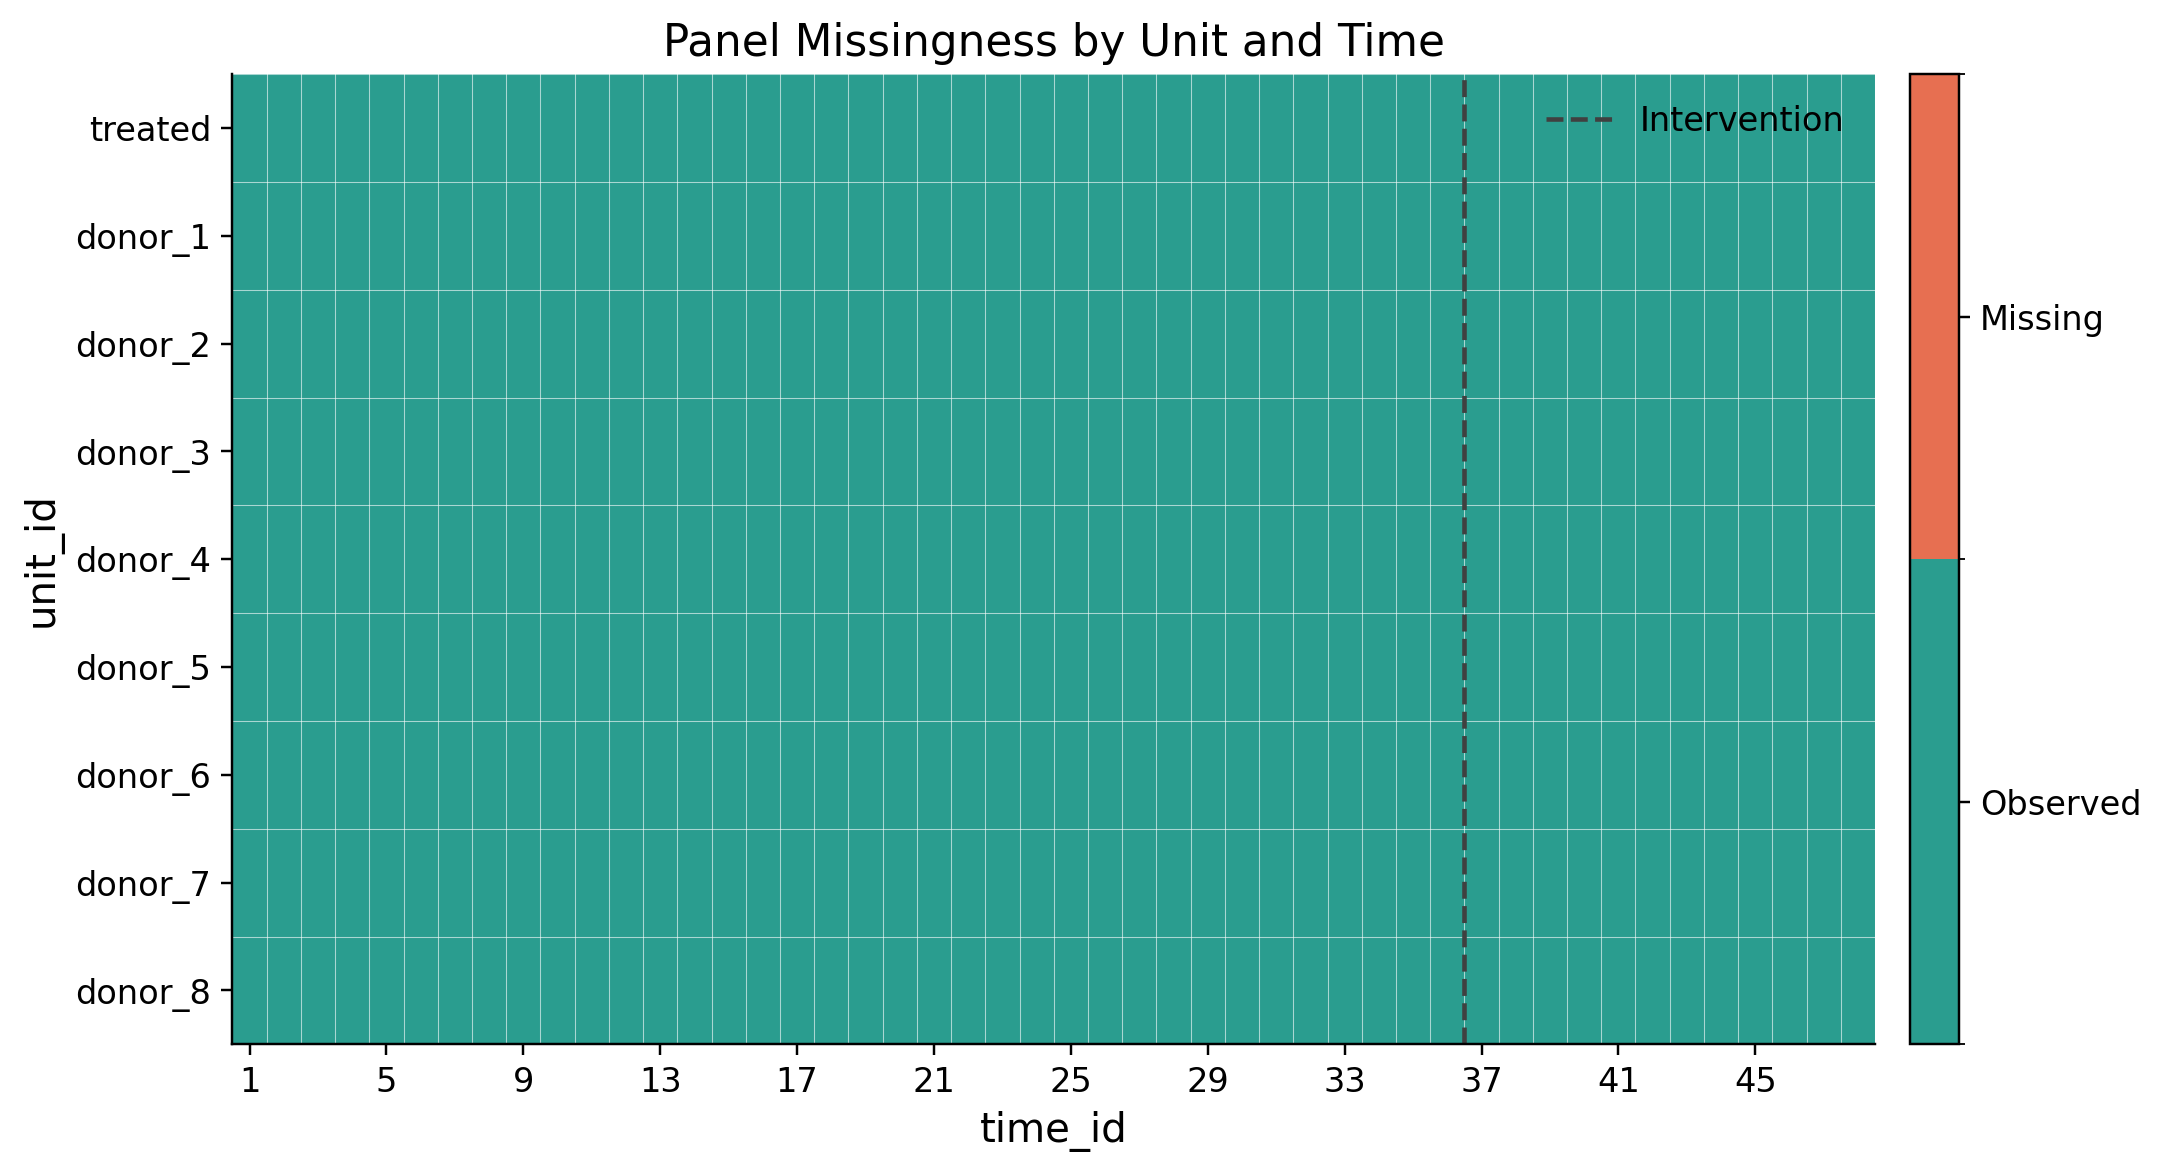

In [6]:
from causalis.scenarios.synthetic_control.refutation import missing_panel_plot

missing_panel_plot(paneldata)

# Inference

In [7]:
from causalis.scenarios.synthetic_control import SyntheticControl
model = SyntheticControl().fit(paneldata)
result = model.estimate()

In [8]:
result.summary()

,value
field,
estimand,ATTE
model,AugmentedSyntheticControl
value,9.0416
value_relative,39.5242
alpha,0.0500
p_value,0.1250
is_significant,False


# Refutation

In [9]:
from causalis.scenarios.synthetic_control.refutation import run_scm_diagnostics

run_scm_diagnostics(result, paneldata)

{'metrics': {'n_donors': 8,
  'n_pre': 36,
  'n_post': 12,
  'pre_rmse_sc': 7.338427198100336,
  'pre_rmse_aug': 7.180909149048381,
  'att_sc': 9.562221708703884,
  'att_aug': 9.041642554982989,
  'max_weight_sc': 0.3253757049053852,
  'max_abs_weight_aug': 0.32494613729720667,
  'l1_norm_weight_aug': 1.6561186506079122,
  'cond_augmented_gram': 154.25213124484063,
  'n_placebos': 7,
  'min_possible_p': 0.125,
  'p_value_att': 0.125,
  'ci_low_abs': None,
  'ci_high_abs': None,
  'placebo_ci_is_unbounded': True,
  'missing_cell_fraction': None,
  'completion_converged': None,
  'completion_effective_rank': None,
  'mean_gap_last_k_pre_sc': 1.7347652349829492,
  'mean_gap_last_k_pre_aug': 1.9180940127088266,
  'pre_tail_k_used': 3},
 'plots': {'observed_vs_synthetic': '/Users/ioannmartynov/PycharmProjects/Ckit/causalis/scenarios/synthetic_control/refutation/scm_diagnostics_observed_vs_synthetic.png',
  'gap_over_time': '/Users/ioannmartynov/PycharmProjects/Ckit/causalis/scenarios/synthe

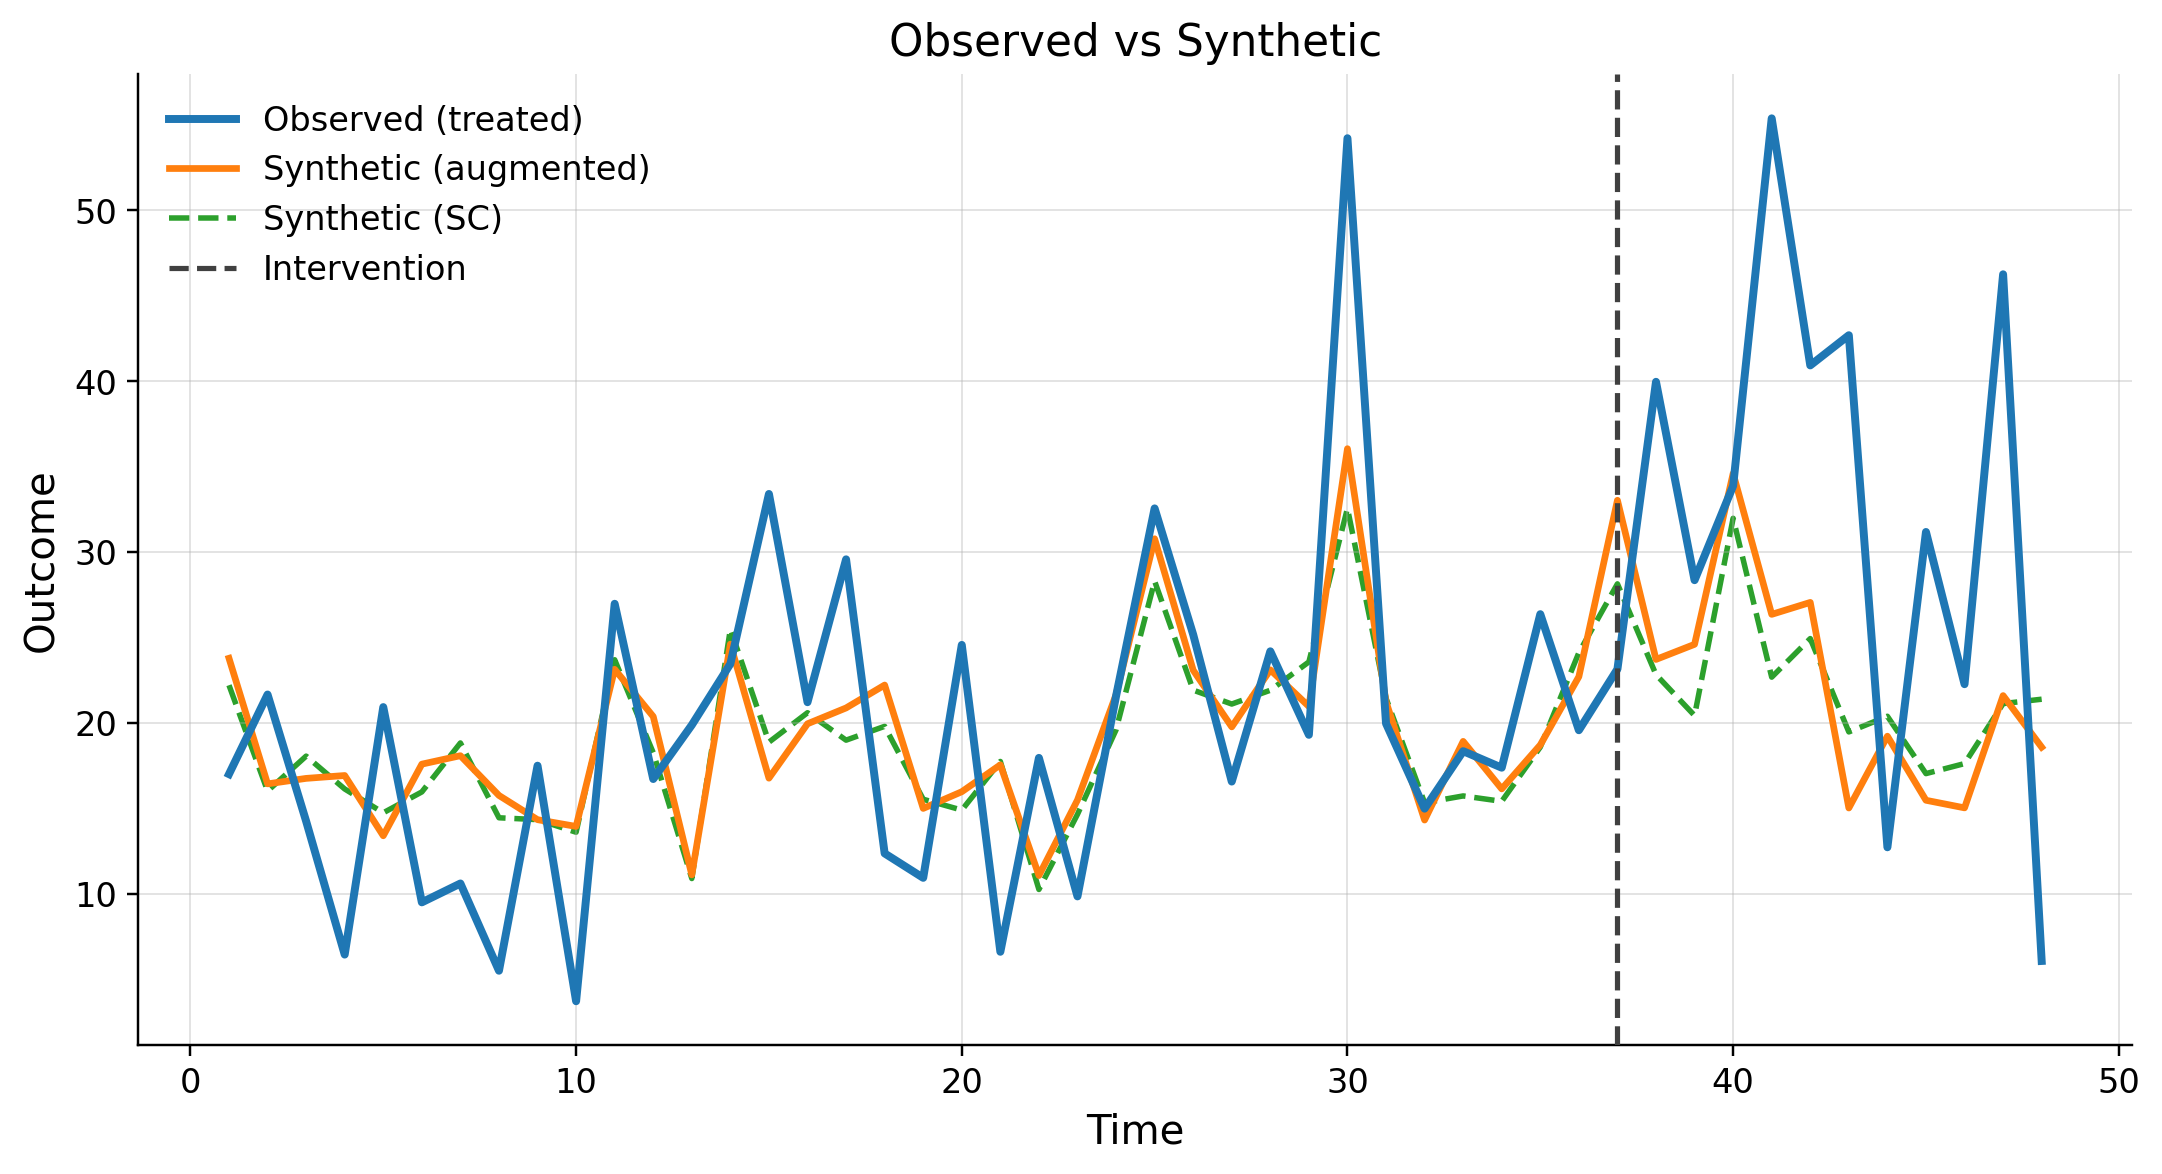

In [10]:
from causalis.scenarios.synthetic_control.refutation import observed_vs_synthetic_plot
observed_vs_synthetic_plot(result)

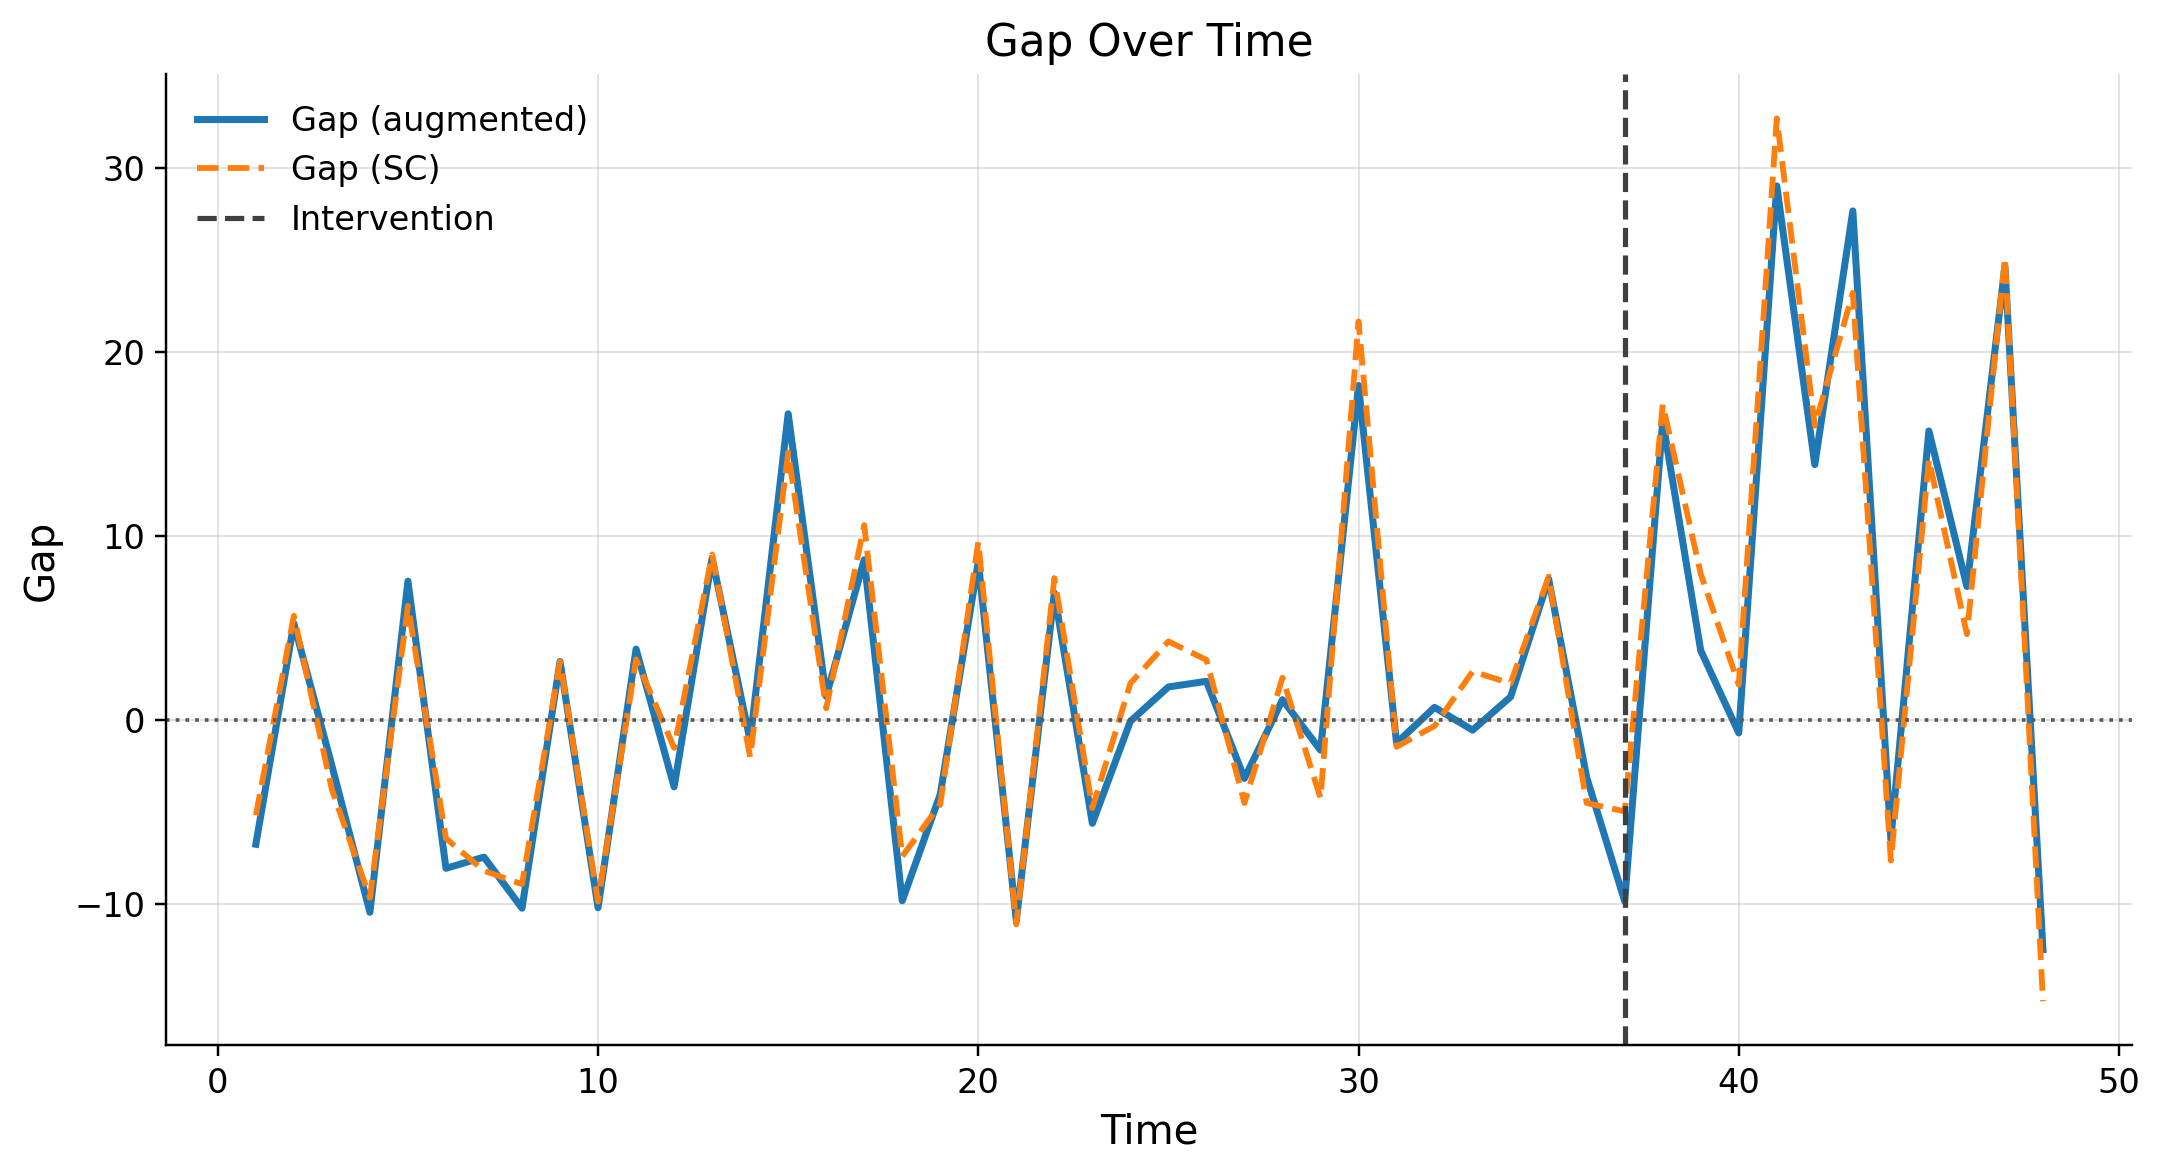

In [11]:
from causalis.scenarios.synthetic_control.refutation import gap_over_time_plot
gap_over_time_plot(result)


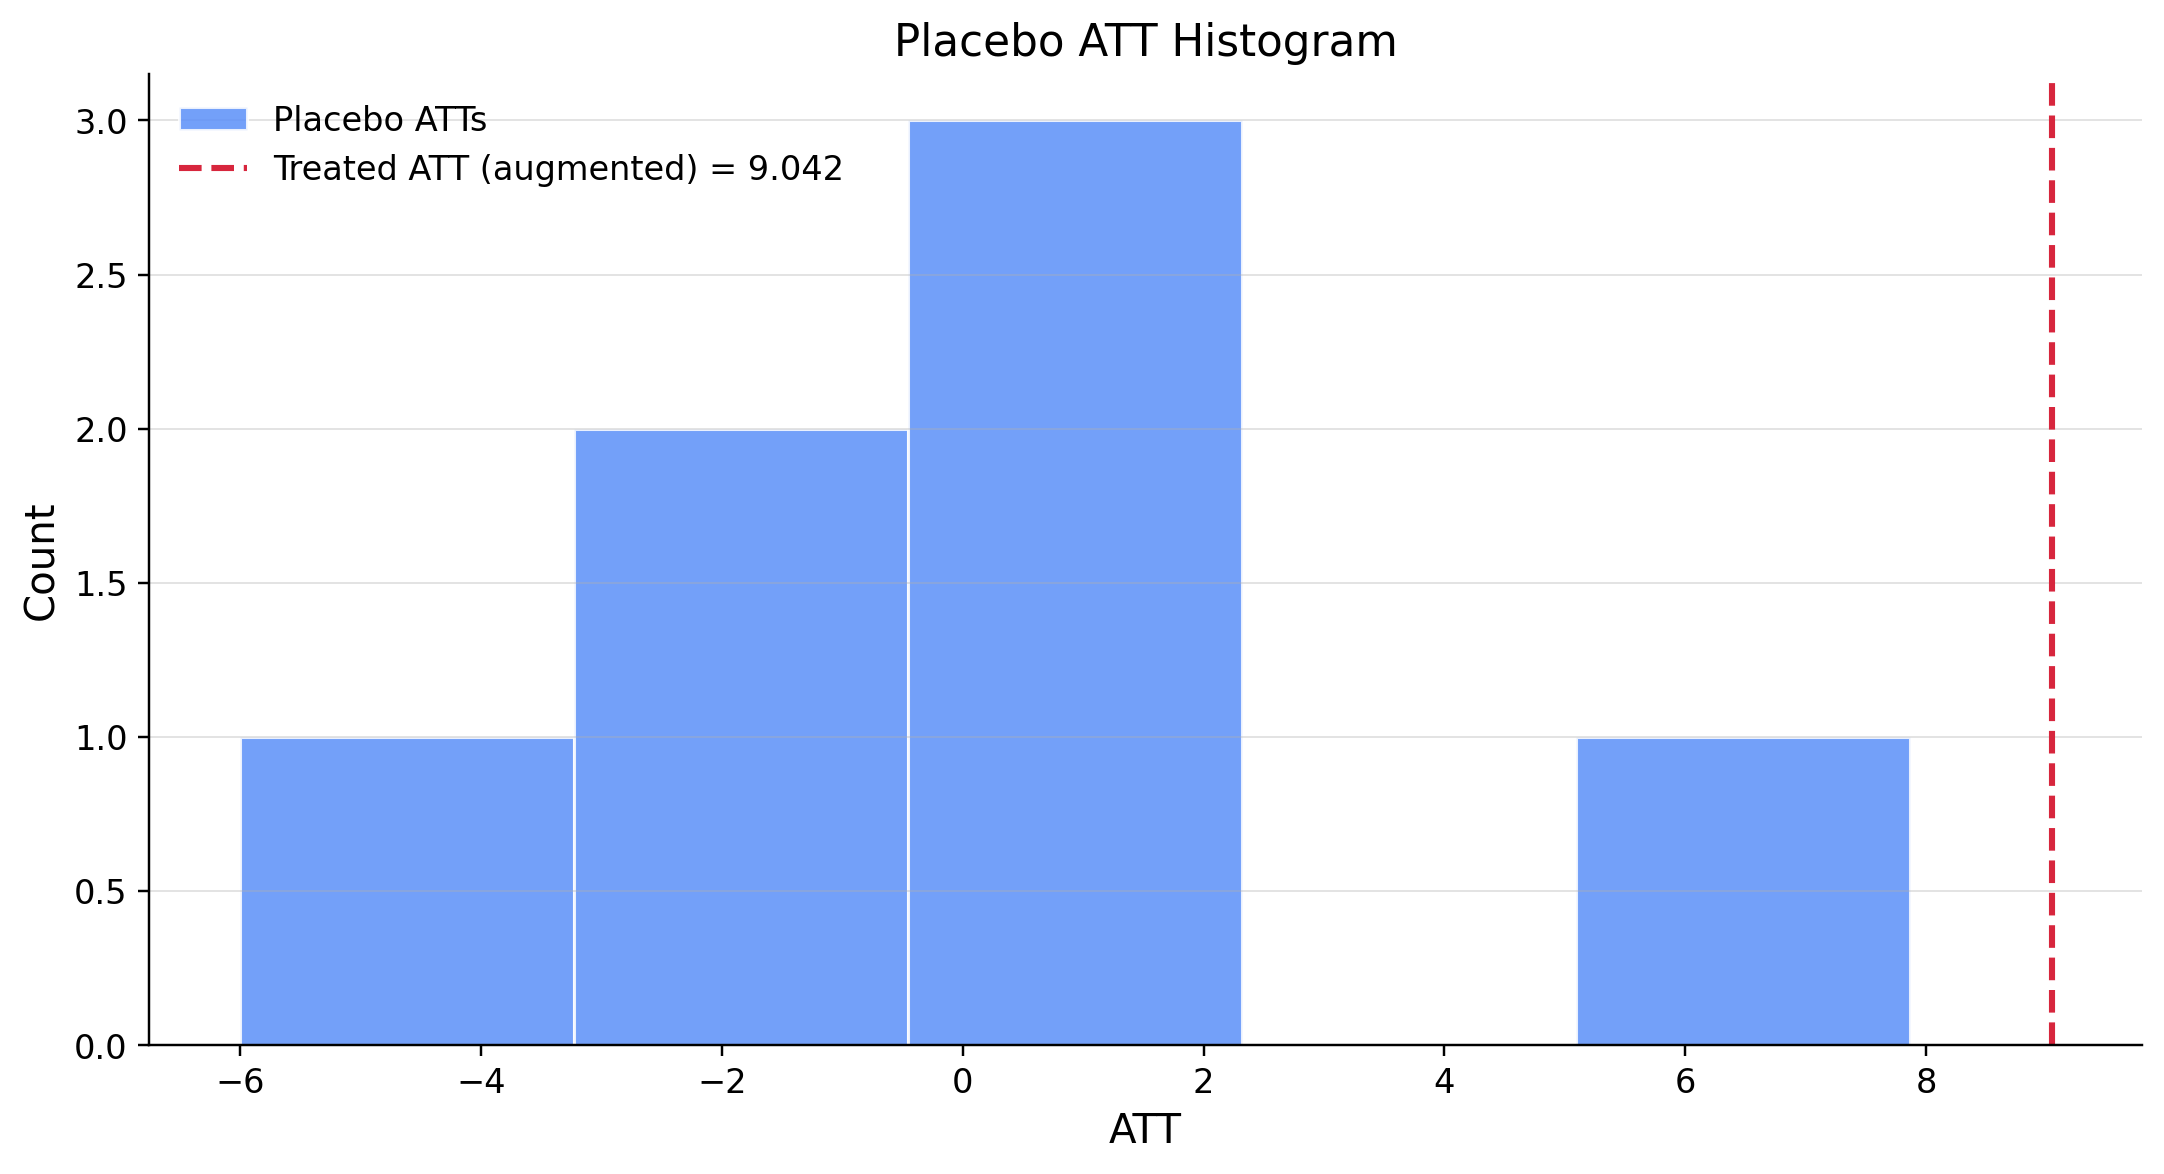

In [12]:
from causalis.scenarios.synthetic_control.refutation import placebo_att_histogram_plot
placebo_att_histogram_plot(result)